In [1]:
import numpy as ny
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
data=pd.read_csv('gld_price_data.csv')
data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


- Corelation: 1.Positive 2.Negative

In [8]:
cor = data.select_dtypes(include=[ny.number]).corr()

#constructiong the heatmap to understand the correlation

<Axes: >

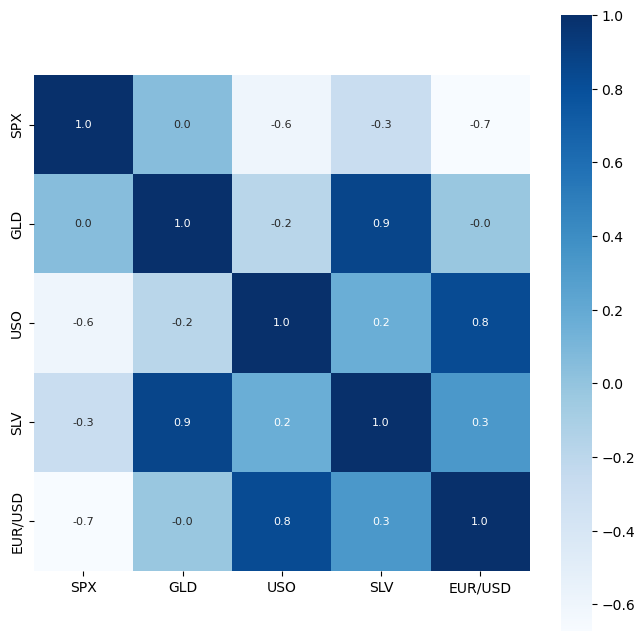

In [9]:
plt.figure(figsize=(8,8))
sb.heatmap(cor,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [10]:
print(cor['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_12196\3339914479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

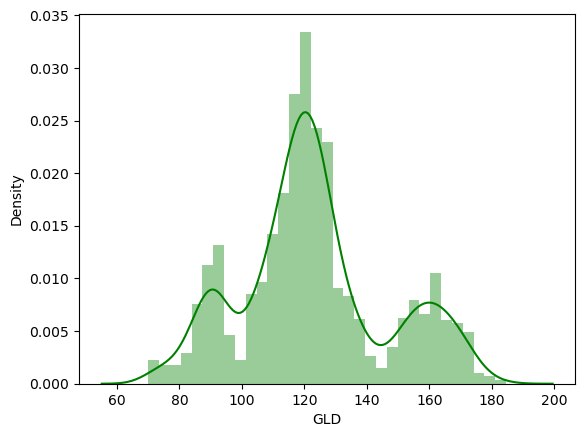

In [11]:
sb.distplot(data['GLD'],color='green')

In [12]:
X=data.drop(['Date','GLD'],axis=1)
Y=data['GLD']

In [13]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [14]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
reg=RandomForestRegressor(n_estimators=100)

In [17]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
test_predict=reg.predict(x_test)
test_predict

array([168.51809924,  81.62409992, 116.16260038, 127.59200083,
       120.63210089, 154.79379786, 150.13079782, 126.15510045,
       117.53569884, 125.98380046, 116.53560138, 171.1988005 ,
       141.36349903, 167.84749875, 115.10420014, 117.83400071,
       137.94060285, 169.84910059, 159.23160285, 160.27169898,
       155.23920069, 125.22050023, 176.43899977, 157.37900272,
       125.23110018,  93.67609972,  77.87659994, 120.63009995,
       119.07309889, 167.67240031,  88.21820037, 124.98830021,
        91.06900085, 117.76970024, 121.08699924, 136.46940071,
       115.63200105, 115.08910082, 148.9539    , 107.22990086,
       104.28120268,  87.14159798, 126.51620104, 117.96089965,
       152.85629883, 119.66389987, 108.38409988, 107.99019781,
        93.1086004 , 127.13039785,  74.7148003 , 113.58619916,
       121.38080007, 111.28919925, 118.8496988 , 120.53979945,
       158.81480022, 166.80680142, 147.14909744,  85.64449832,
        94.27950033,  86.85589905,  90.62420005, 118.98

In [19]:
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

In [20]:
error_score=metrics.r2_score(y_test,test_predict)

In [21]:
error_score

0.9895939678804537

In [22]:
y_test=list(y_test)

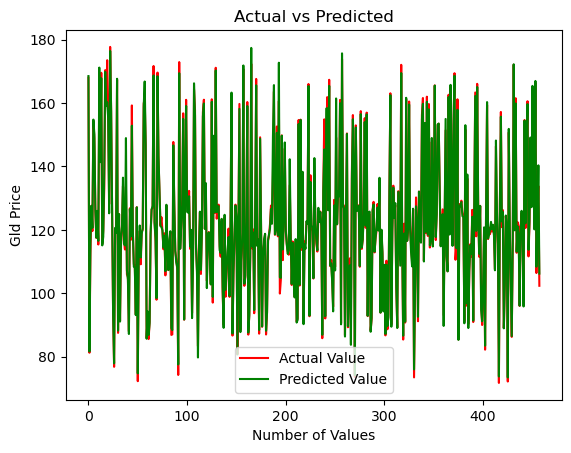

In [23]:
plt.plot(y_test,label='Actual Value',color='red')
plt.plot(test_predict,label='Predicted Value',color='green')
plt.title("Actual vs Predicted")
plt.xlabel("Number of Values")
plt.ylabel("Gld Price")
plt.legend()
plt.show()